## 🍀 **Ensemble Learninig**
-------

### 🌳**AdaBoost (Adaptive Boosting)**
- classifier의 accuracy를 향상시키기 위해 다수의 weak classifier를 결합시킴 
- weak classifier(learner) : 랜덤 모델에 비해 약간의 성능 향상이 있는 모델 
- 오류 데이터에 가중치를 부여하며 boosting을 수행하는 대표적 알고리즘
- AdaBoost는 다수의 weighted training

<p align="center">
    <img src="./imgs/ensemble/adaboost2.png" width = "40%" height = "40%">
</p>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 50)

import sklearn
print("Scikit-Learn Version : ", sklearn.__version__)

Scikit-Learn Version :  0.24.2


### 🗂️ **간단한 데이터셋**
- 우선 make_classification 함수를 이용하여 간단한 데이터셋을 생성하고 AdaBoost을 적용해보도록 합니다.
- **make_classification 함수**
    - n_samples : 표본 데이터의 수 (default = 100)
    - n_features : 독립 변수의 수 (default = 20)
    - n_informative : 독립 변수 중 종속 변수와 상관관계가 있는 성분의 수 (default = 2)
    - n_rebundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수 (default = 2)
    - n_clusters_per_class : 클래스당 클러스터의 수

#### Step 1: 데이터셋 생성

In [2]:
X, y = make_classification(n_samples = 50, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 42, shuffle = True)

- x와 y의 모양은 다음과 같습니다. 각각의 변수에는 50개의 객체가 들어있습니다.

In [3]:
X.shape, y.shape

((50, 2), (50,))

#### Step 2: AdaBoostClassifier 생성
- **base_estimator** : ensemble을 할 model. 학습에 사용하는 알고리즘
- **n_estimators** : 생성할 약한 학습기 갯수 지정 (default = 50)
- **learning_rate** : 학습을 진행할 때마다 적용하는 학습률(0~1)/weak learner가 순차적으로 오류값을 보정해나갈 때 적용하는 계수 (default = 1.0)
- **random_state** : 실행시 동일한 랜덤 숫자값이 나오도록 설

In [4]:
clf = AdaBoostClassifier(n_estimators = 100, random_state = 42)
clf.fit(X, y)

AdaBoostClassifier(n_estimators=100, random_state=42)

#### Step 3 : 결과값 예측

In [5]:
clf.predict([[0, 0]])

array([0])

#### Step 4 : 결과 시각화
* 결과 시각화를 통해 어떤 식으로 분류가 되었는지 확인해봅니다.

In [6]:
from matplotlib.colors import ListedColormap
def plot_ada(X, y, clf):
    plt.figure(figsize = (7,7))
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('gray', 'white')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('blue', 'red'))(i), label = j)

    plt.title('Predictions')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


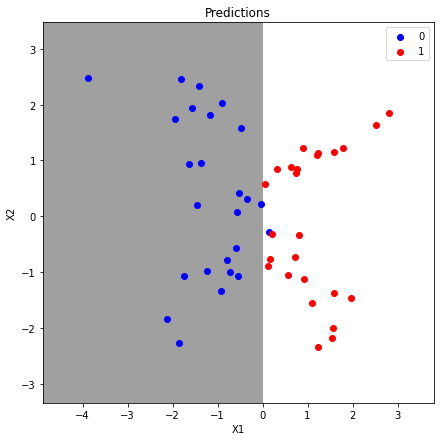

In [7]:
plot_ada(X, y, clf)

해당 결과에서 1은 모두 잘 분류가 되었지만, 일부 0라벨에 해당되는 데이터는 잘 분리되지 못한 모습을 확인할 수 있었습니다.

### 🗂️ **Tabular 데이터셋**
- 이번에는 조금 더 복잡한  tabular 데이터셋을 이용하여 실험을 진행해보도록 합니다.
- **dataset** : Email Spam Classification Dataset (csv) [download](https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv)
-   5172개의 random하게 선정된 email file들과 spam에 대한 각각의 label 값 정보가 들어있습니다.

#### Step 1 : 데이터 전처리

In [8]:
emails = pd.read_csv('./dataset/emails.csv')
emails

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,...,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,5,6,1,0,0,20,1,0,0,1,0,0,3,0,18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,23,18,6,3,1,98,10,6,2,2,6,1,11,15,101,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,1,1,3,1,0,10,0,0,0,0,0,0,1,0,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,8,11,7,1,0,39,1,0,0,0,2,1,3,3,37,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [9]:
feature_name = emails.iloc[:, 0].values.tolist()
feature_name[:5]

['Email 1', 'Email 2', 'Email 3', 'Email 4', 'Email 5']

In [10]:
# emails dataset의 열들을 살펴본다
emails.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [11]:
target = emails['Prediction']
target[:5]

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [12]:
# 이메일 정보가 부여되어 있는 열을 drop 해줍니다
emails = emails.drop('Email No.', axis = 1)

- target 분포의 경우, 다음과 같이 정상(0)에 해당되는 class가 이상치(1)에 해당되는 class보다 많이 분포하고 있음을 확인할 수 있습니다.

Text(0.5, 1.0, 'Target')

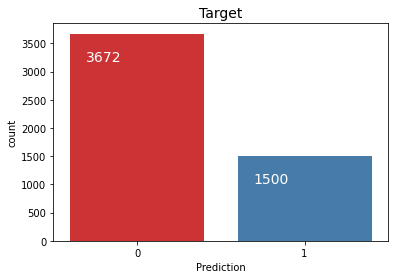

In [13]:
import seaborn as sns 

cnt = sns.countplot(x=emails['Prediction'], data=emails, palette = 'Set1')

for p in cnt.patches:
    cnt.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 14)
cnt.set_title('Target', size = 14)

- train과 test 비율을 7:3으로 하여 split해줍니다.

In [14]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(emails, target, test_size = 0.3, shuffle = True, stratify = target, random_state = 42)

- 다음과 같이 train 데이터셋의 경우 3620개, test 데이터셋의 경우 1552개로 구성되어 있다는 점을 확인할 수 있습니다.

In [15]:
print(x_train.shape, x_test.shape)

(3620, 3001) (1552, 3001)


#### Step 2 : model에 fit
- n_estimators : 30
- learning_rate : 0.1

다음과 같이 파라미터 값을 설정해줍니다.

In [16]:
clf = AdaBoostClassifier(n_estimators = 30, random_state = 42, learning_rate = 0.1)
clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=30, random_state=42)

#### Step 3: 결과값 예측 (test 데이터셋)

In [17]:
pred = clf.predict(x_test)
np.unique(pred)

array([0, 1])

In [18]:
# accuracy
accuracy_score(y_test, pred)

1.0

Text(0.5, 15.0, 'Actual')

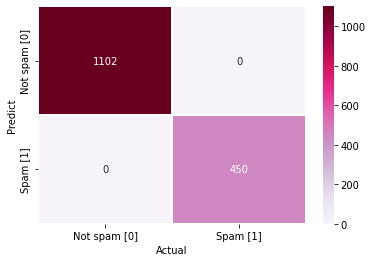

In [19]:
result = pd.DataFrame()
result['real'] = y_test
result['pred'] = pred

matrix = confusion_matrix(result['pred'], result['real'])
sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predict']),
            xticklabels=['Not spam [0]', 'Spam [1]'], 
            yticklabels=['Not spam [0]', 'Spam [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap='PuRd')
plt.ylabel('Predict')
plt.xlabel('Actual')

위의 경우에는 not spam과 spam 두 라벨에 대해 모두 완벽하게 맞추며 accuracy 1을 달성한 모습을 확인할 수 있습니다.

### 🌳 **[심화과정]** Stump tree의 갯수에 따른 성능 변화
-------
* 이번에는 stump tree의 갯수가 달라짐에 따라 어떻게 성능 변화가 일어나는지 살펴보도록 하겠습니다.
> #### stump tree란?
decision tree에서 1개의 node와 2개의 leaf를 가지는 모양을 의미합니다. stump는 1개의 node를 가지기에 오진 하나의 변수만을 사용한다고 볼 수 있으며 _weak learner_ 라고 할 수 있습니다.

<p align="center">
    <img src="./imgs/ensemble/stump1.jpg" width = "50%" height = "50%">
</p>

AdaBoost는 각 트리별 중요도에 있어 차이가 난다는 특징이 있습니다. 하단의 그림을 참고하여 보자면 각 stump의 크기가 다른 것을 확인할 수 있고, boosting의 특징에 따라 이전 stump의 정보를 참고하며 종속적이고 sequential하게 모델을 생성하게 됩니다.

<p align="center">
    <img src="./imgs/ensemble/stump2.jpg" width = "50%" height = "50%">
</p>

### 🗂️**Dataset**
----
* 해당 실험에서는 sklearn에서 제공하는 breast_cancer 데이터셋을 이용합니다.
* load_breast_cancer 함수를 이용하여 데이터를 불러옵니다.

#### **✅ 1개의 stump tree 이용**

#### Step 1 : 데이터 전처리

In [20]:
data = load_breast_cancer()

data_df = pd.DataFrame(data.data, columns=data.feature_names)
target_df = pd.DataFrame(data.target).rename(columns={0:'Diagnosis'})

dataset_df = pd.concat([data_df, target_df], axis=1)
dataset_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


* target 변수에 해당되는 Diagnosis 변수는 0과 1의 값으로 이루어져 있음을 확인할 수 있습니다.
* target이 1(음성)인 경우는 총 357개, target이 0(양성)인 경우는 총 212개인 것을 확인할 수 있습니다.

In [21]:
np.unique(dataset_df['Diagnosis']), np.sum(dataset_df['Diagnosis']), len(dataset_df['Diagnosis']) - np.sum(dataset_df['Diagnosis'])

(array([0, 1]), 357, 212)

* train과 test 데이터셋으로 split을 해줍니다.

In [22]:
X = dataset_df.drop('Diagnosis', axis = 1)
y = dataset_df['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(x_train.shape, x_test.shape)

(398, 30) (171, 30)


#### Step 2 : AdaBoost classifier의 초기화
* 우선 1개의 stump tree를 이용하여 AdaBoost classifier를 초기화 시켜줍니다.

In [23]:
adab_clf = AdaBoostClassifier(n_estimators = 1, random_state = 42)

#### Step 3 : 학습 데이터셋 fit
* 초기화 시켜준 classifier에 학습 데이터셋을 fitting시켜줍니다.

In [24]:
adab_2stump = adab_clf.fit(x_train, y_train)

#### Step 4: classifier 평가
* test 데이터셋에 대한 예측을 수행하고 metric을 이용하여 성능평가를 진행합니다.

In [25]:
ada_pred = adab_2stump.predict(x_test)

* 실제 label값과 classifier로 예측된 label값이 들어있는 데이터프레임을 생성합니다.

In [26]:
result = pd.DataFrame()
result['real'] = y_test
result['pred'] = ada_pred

Text(0.5, 15.0, 'Actual')

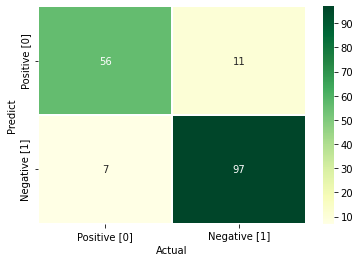

In [27]:
matrix = confusion_matrix(result['pred'], result['real'])
sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predict']),
            xticklabels=['Positive [0]', 'Negative [1]'], 
            yticklabels=['Positive [0]', 'Negative [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap='YlGn')
plt.ylabel('Predict')
plt.xlabel('Actual')

In [28]:
print("Accuracy : ", round(accuracy_score(result['real'], result['pred']), 3))

Accuracy :  0.895


다음과 같이 1개의 stump tree만을 사용하게 된다면 accuracy가 약 0.895로 상대적으로 낮은 값을 보이고 있음을 확인할 수 있습니다. 양성(0)의 경우에는 총 63개 중 56개를 옳게 예측하고 있었으며, 음성(1)의 경우에는 총 108개 중 97개를 옳게 예측하고 있었습니다. 이는 위에서 정의한 바와 같이 하나의 변수만을 이용하여 split을 진행하기 때문이라고 할 수 있습니다.

#### **✅ 5개의 stump tree 이용**
* 이번에는 5개의 stump tree를 이용하는 경우 어떠한 성능 변화가 있는지 살펴보겠습니다.
* 1개의 stump tree를 이용하였을 때와 마찬가지로 model fit, 평가순으로 진행합니다.
* 차이점이 있다면 n_estimator를 1에서 5로 바꾸어 주었다는 점입니다.

In [29]:
adab_clf = AdaBoostClassifier(n_estimators = 5, random_state = 45)
adab_5stump = adab_clf.fit(x_train, y_train)
ada_pred = adab_5stump.predict(x_test)

* 마찬가지로 결과에 대한 데이터프레임을 만들고 metric을 통해 평가를 진행합니다.

Text(0.5, 15.0, 'Actual')

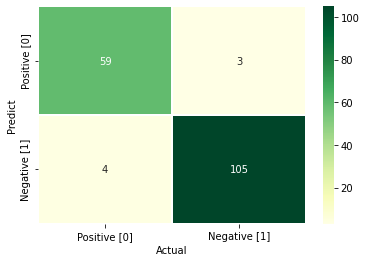

In [30]:
result = pd.DataFrame()
result['real'] = y_test
result['pred'] = ada_pred

matrix = confusion_matrix(result['pred'], result['real'])
sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predict']),
            xticklabels=['Positive [0]', 'Negative [1]'], 
            yticklabels=['Positive [0]', 'Negative [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap='YlGn')
plt.ylabel('Predict')
plt.xlabel('Actual')

In [31]:
print("Accuracy : ", round(accuracy_score(result['real'], result['pred']), 3))

Accuracy :  0.959


다음과 같이 5개의 stump tree를 사용하게 된다면 accuracy가 약 0.959로 1개의 stump tree를 사용했을 떄(0.895)보다 성능이 향상된 모습을 확인할 수 있었습니다. 양성(0)의 경우에는 총 63개 중 59개를 옳게 예측하고 있었으며, 음성(1)의 경우에는 총 108개 중 105개를 옳게 예측하고 있었습니다. 1개의 stump tree를 이용했을 때보다 양성(0)은 3개, 음성(1)은 8개를 더 잘 맞추는 모습을 확인할 수 있었습니다. Adaboost의 특성상 각 stump를 생성할 때 이전 stump의 정보를 참고하기 때문에 성능이 향상되었다고 해석할 수 있습니다.

#### **✅ 10개의 stump tree 이용**
* 마지막으로 5개의 stump tree를 이용하는 경우 어떠한 성능 변화가 있는지 살펴보겠습니다.
* 1개의 stump tree를 이용하였을 때와 마찬가지로 model fit, 평가순으로 진행합니다.
* 차이점이 있다면 n_estimator를 10로 바꾸어 주었다는 점입니다.

In [32]:
adab_clf = AdaBoostClassifier(n_estimators = 10, random_state = 45)
adab_10stump = adab_clf.fit(x_train, y_train)
ada_pred = adab_10stump.predict(x_test)

* 동일하게 결과 시각화와 성능 평가를 진행합니다.

Text(0.5, 15.0, 'Actual')

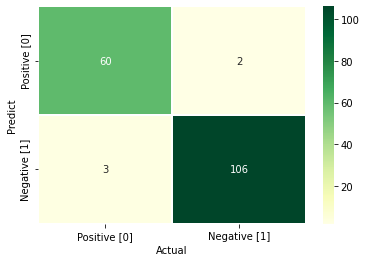

In [33]:
result = pd.DataFrame()
result['real'] = y_test
result['pred'] = ada_pred

matrix = confusion_matrix(result['pred'], result['real'])
sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predict']),
            xticklabels=['Positive [0]', 'Negative [1]'], 
            yticklabels=['Positive [0]', 'Negative [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap='YlGn')
plt.ylabel('Predict')
plt.xlabel('Actual')

In [34]:
print("Accuracy : ", round(accuracy_score(result['real'], result['pred']), 3))

Accuracy :  0.971


다음과 같이 10개의 stump tree를 사용하게 된다면 accuracy가 약 0.959로 1개의 stump tree를 사용했을 떄(0.895)보다 성능이 향상된 모습을 확인할 수 있었습니다. 양성(0)의 경우에는 총 63개 중 59개를 옳게 예측하고 있었으며, 음성(1)의 경우에는 총 108개 중 105개를 옳게 예측하고 있었습니다. 1개의 stump tree를 이용했을 때보다 양성(0)은 3개, 음성(1)은 8개를 더 잘 맞추는 모습을 확인할 수 있었습니다. Adaboost의 특성상 각 stump를 생성할 때 이전 stump의 정보를 참고하기 때문에 성능이 향상되었다고 해석할 수 있습니다.

#### **✅ 100개, 1000개의 stump tree 이용**
* 마지막으로 100, 1000으로 n_estimator를 설정하고 동일 과정으로 실험을 진행해봅니다.

Accuracy :  0.982


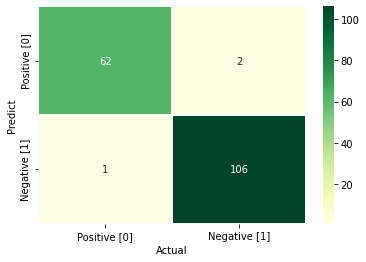

In [35]:
adab_clf = AdaBoostClassifier(n_estimators = 100, random_state = 45)
adab_100stump = adab_clf.fit(x_train, y_train)
ada_pred = adab_100stump.predict(x_test)

result = pd.DataFrame()
result['real'] = y_test
result['pred'] = ada_pred

matrix = confusion_matrix(result['pred'], result['real'])
sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predict']),
            xticklabels=['Positive [0]', 'Negative [1]'], 
            yticklabels=['Positive [0]', 'Negative [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap='YlGn')
plt.ylabel('Predict')
plt.xlabel('Actual')

print("Accuracy : ", round(accuracy_score(result['real'], result['pred']), 3))

다음과 같이 100개의 stump tree를 이용하게 되는 경우 accuracy는 약 0.982로 10개의 stump tree(0.971)을 이용하였을 때보다 accuracy가 향상됨을 확인할 수 있고, 이 경우에는 이전 모형의 약점을 잘 보완하여 weak learner(classifier)를 조합하여 strong learner(classifier)가 생성되었다고 해석할 수 있습니다.

Accuracy :  0.977


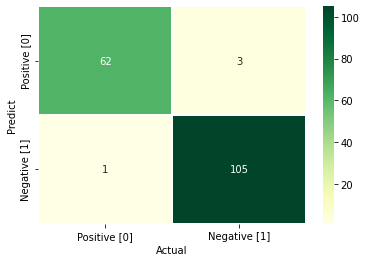

In [36]:
adab_clf = AdaBoostClassifier(n_estimators = 1000, random_state = 45)
adab_1000stump = adab_clf.fit(x_train, y_train)
ada_pred = adab_1000stump.predict(x_test)

result = pd.DataFrame()
result['real'] = y_test
result['pred'] = ada_pred

matrix = confusion_matrix(result['pred'], result['real'])
sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predict']),
            xticklabels=['Positive [0]', 'Negative [1]'], 
            yticklabels=['Positive [0]', 'Negative [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap='YlGn')
plt.ylabel('Predict')
plt.xlabel('Actual')

print("Accuracy : ", round(accuracy_score(result['real'], result['pred']), 3))

다음과 같이 1000개의 stump tree를 이용하게 되는 경우 accuracy는 약 0.977로 100개의 stump tree(0.982)을 이용했을 때보다 성능이 하락하며 overfitting이 발생했다고 볼 수 있습니다. 하지만, 1000은 비교적 극단값이라는 점을 생각해보면 AdaBoost는 overfitting에 강건한 모습을 보인다는 인사이트를 얻을 수 있습니다.

### 🌳 **[Result]** Stump tree의 갯수에 따른 성능 변화
-----

|**Stump**|1|5|10|100|1000|
|:--:|:--:|:--:|:--:|:--:|:--:|
|**Accuracy**|0.895|0.959|0.971|0.982|0.977|

### 🔎 **[심화과정] Hyperparameter Tuning**
---------
1. **base_estimator** : ensemble을 할 model. 학습에 사용하는 알고리즘
2. **n_estimators** : 생성할 약한 학습기 갯수 지정 (default = 50)
3. **learning_rate** : 학습을 진행할 때마다 적용하는 학습률(0~1)/weak learner가 순차적으로 오류값을 보정해나갈 때 적용하는 계수 (default = 1.0)
4. **random_state** : 실행시 동일한 랜덤 숫자값이 나오도록 설정

In [37]:
from sklearn.model_selection import GridSearchCV

clf = AdaBoostClassifier(random_state = 42)
param = {'n_estimators': [100, 256, 500, 1000], 'learning_rate' : [0.1, 0.5, 1.0]}

grid_cv = GridSearchCV(clf, param_grid = param, cv = 5, verbose = 1, n_jobs = 1)
grid_cv.fit(x_train, y_train.values)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 256, 500, 1000]},
             verbose=1)

In [38]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [39]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.112527,0.001444,0.007899,0.000063,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.9750,0.9375,0.9625,0.974684,0.936709,0.957278,0.017080,8
1,0.284404,0.001827,0.018537,0.000118,0.1,256,"{'learning_rate': 0.1, 'n_estimators': 256}",0.9750,0.9375,0.9625,0.974684,0.936709,0.957278,0.017080,8
2,0.551320,0.000551,0.035329,0.000166,0.1,500,"{'learning_rate': 0.1, 'n_estimators': 500}",0.9750,0.9500,0.9625,0.974684,0.936709,0.959778,0.014759,6
3,1.113012,0.022002,0.069488,0.000112,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9750,0.9500,0.9625,0.974684,0.924051,0.957247,0.018981,11
4,0.111486,0.000214,0.007868,0.000059,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.9750,0.9375,0.9625,0.974684,0.936709,0.957278,0.017080,8
5,0.283083,0.000292,0.018755,0.000294,0.5,256,"{'learning_rate': 0.5, 'n_estimators': 256}",0.9750,0.9375,0.9750,0.974684,0.936709,0.959778,0.018515,6
6,0.553283,0.002306,0.035426,0.000114,0.5,500,"{'learning_rate': 0.5, 'n_estimators': 500}",0.9750,0.9500,0.9750,0.974684,0.936709,0.962278,0.016013,4
7,1.102723,0.000986,0.070023,0.000369,0.5,1000,"{'learning_rate': 0.5, 'n_estimators': 1000}",0.9750,0.9500,0.9750,0.974684,0.936709,0.962278,0.016013,4
8,0.111493,0.000332,0.007851,0.000076,1,100,"{'learning_rate': 1.0, 'n_estimators': 100}",0.9750,0.9375,0.9875,0.974684,0.911392,0.957215,0.028380,12
9,0.283137,0.000316,0.018575,0.000116,1,256,"{'learning_rate': 1.0, 'n_estimators': 256}",0.9750,0.9625,0.9875,0.974684,0.949367,0.969810,0.012923,1


In [40]:
print(grid_cv.best_params_)
print(round(grid_cv.best_score_, 3))

{'learning_rate': 1.0, 'n_estimators': 256}
0.97


learning rate가 1.0인 경우, n_estimators가 256일 때 best paramter로 산출됨을 확인할 수 있습니다.

In [41]:
gb_pred = grid_cv.best_estimator_.predict(x_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(round(gb_acc, 3))

0.971


best parameter로 test 데이터셋 성능 평가를 진행할 시 accuracy가 약 0.971로 산출됨을 확인할 수 있습니다.

#### 📊 **[Result] Hyperparameter Tuning**
-----
각 결과를 시각화하여 추가적인 분석을 진행합니다.

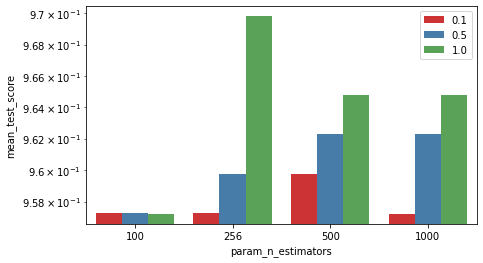

In [42]:
plt.figure(figsize = (7,4))
bar = sns.barplot(x = "param_n_estimators", y = "mean_test_score", hue = "param_learning_rate", data = scores_df , palette = 'Set1')
bar.set_yscale("log")
bar.legend(bbox_to_anchor= (1, 1))
plt.show()

n_estimator가 100인 경우를 제외한 3가지 경우 learning rate가 증가함에 따라 성능 향상이 있음을 확인할 수 있었습니다. 추가적으로 n_estimator가 256인 경우 가장 성능 변화폭이 두드러짐을 확인할 수 있었습니다. learning_rate를 줄인다면 가중치 갱신의 변동폭이 감소해서 여러 학습기들의 decision boundary 차이가 줄어들며 성능이 하락한다고 추가적인 해석을 해볼 수 있습니다.

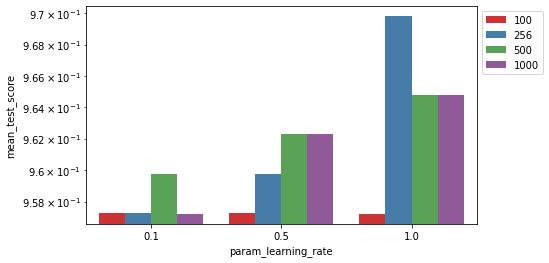

In [43]:
plt.figure(figsize = (7,4))
bar = sns.barplot(x = "param_learning_rate", y = "mean_test_score", hue = "param_n_estimators", data = scores_df , palette = 'Set1')
bar.set_yscale("log")
bar.legend(bbox_to_anchor= (1, 1))
plt.show()

learning_rate가 0.5인 경우 n_estimator가 증가함에 따라 성능 향상이 있음을 확인할 수 있었습니다. 이와는 반대로 다른 경우에는 중간 n_estimator에 해당될 떄 성능이 가장 높은 모습을 확인할 수 있었습니다. n_estimators를 늘린다면 생성하는 weak learner의 수 증가하고, 복잡한 decision boundary를 생성하게 되며 모델이 복잡해진다는 점을 고려해보면 위와 같은 성능 변화 결과의 해석이 가능합니다.

### **🌲 AdaBoost의 장단점**
------

- **장점**
    * overfitting에 비교적 덜 취약함
    * bias와 variance를 줄이는데 도움을 줌
    * 해당 방법론을 통해 weak classifier의 accuracy가 향상될 수 있음
    * 사용이 비교적 쉬움
- **단점**
    * 양질의 데이터셋이 필요함
    * outlier와 noise에 민감함
    * XGBoost보다 느린 속도

#### 🗂️ **Reference**
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
https://www.analyticsvidhya.com/blog/2022/01/introduction-to-adaboost-for-absolute-beginners/
https://analyticsindiamag.com/introduction-to-boosting-implementing-adaboost-in-python/
